## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [764]:
# Your code here - remember to use markdown cells for comments as well!

In [765]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# scaling and train test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# evaluation on test data
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
from sklearn.metrics import classification_report,confusion_matrix

In [766]:
file_path = "\\Users\\eggfr\\Flatiron\\Flatiron_phase2_project\\dsc-phase-2-project\\data\\kc_house_data.csv"
project2_raw_df = pd.read_csv(file_path)

In [767]:
project2_raw_df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors waterfront  view  ...          grade sqft_above  \
0      5650     1.0        NaN  NONE  ...      7 Average       1180   
1      7242     2.0         NO  NONE  ...      7 Average       2170   
2     10000     1.0         NO  NONE  ...  6 Low Average        770   
3      5000     1.0         NO  NONE  ...      7 Average       1050   
4      8080     1.0         NO  NONE  ...         8 Good       1680   

   sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
0            0.0     1955           0.0    98178  47.5112 -122.257   
1          400.0     1951        1991.0    98125  47.7210 -122.319   
2            0.0     1933           NaN    98028  47.7379 -122.233   
3          910.0     1965           0.0    98136  47.5208 -122.393   
4            0.0     1987           0.0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503  

[5 rows x 21 columns]

In [768]:
project2_raw_df.nunique()

id               21420
date               372
price             3622
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         942
sqft_basement      304
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
dtype: int64

In [859]:
project2_raw_df["bathrooms"].value_counts()

2.50    5377
1.00    3851
1.75    3047
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

This dataset contains house sale prices for King County, which includes Seattle.
It includes homes sold between May 2014 and May 2015.
21 columns. (features)
21597 rows.

id: Unique ID for each home sold
date: Date of the home sale
price: Price of each home sold
bedrooms: Number of bedrooms
bathrooms: Number of bathrooms, where .5 accounts for a room with a toilet but no shower
sqft_living: Square footage of the apartments interior living space
sqft_lot: Square footage of the land space
floors: Number of floors
waterfront: - A dummy variable for whether the apartment was overlooking the waterfront or not
view: An index from 0 to 4 of how good the view of the property was
condition: - An index from 1 to 5 on the condition of the apartment,
grade: An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
sqft_above: The square footage of the interior housing space that is above ground level
sqft_basement: The square footage of the interior housing space that is below ground level
yr_built: The year the house was initially built
yr_renovated: The year of the house’s last renovation
zipcode: What zipcode area the house is in
lat: Lattitude
long: Longitude
sqft_living15: The square footage of interior housing living space for the nearest 15 neighbors
sqft_lot15: The square footage of the land lots of the nearest 15 neighbors

In [769]:
project2_raw_df.shape

(21597, 21)

In [770]:
print(project2_raw_df.columns.values)

['id' 'date' 'price' 'bedrooms' 'bathrooms' 'sqft_living' 'sqft_lot'
 'floors' 'waterfront' 'view' 'condition' 'grade' 'sqft_above'
 'sqft_basement' 'yr_built' 'yr_renovated' 'zipcode' 'lat' 'long'
 'sqft_living15' 'sqft_lot15']


In [771]:
project2_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [772]:
project2_raw_df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    sqft_above      yr_built  yr_renovated  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  17755.000000   
mean   1.509941e+04      1.494096   1788.596842   1970.999676     83.636778   
std    4.141264e+04      0.539683    827.759761     29.375234    399.946414   
min    5.200000e+02      1.000000    370.000000   1900.000000      0.000000   
25%    5.040000e+03      1.000000   1190.000000   1951.000000      0.000000   
50%    7.618000e+03      1.500000   1560.000000   1975.000000      0.000000   
75%    1.068500e+04      2.000000   2210.000000   1997.000000      0.000000   
max    1.651359e+06      3.500000   9410.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21597.000000  21597.000000  21597.000000   21597.000000   21597.000000  
mean   98077.951845     47.560093   -122.213982    1986.620318   12758.283512  
std       53.513072      0.138552      0.140724     685.230472   27274.441950  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471100   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.231000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

In [773]:
project2_raw_df['date'] = pd.to_datetime(project2_raw_df['date'])

project2_raw_df['month'] = project2_raw_df['date'].apply(lambda date:date.month)
project2_raw_df['year'] = project2_raw_df['date'].apply(lambda date:date.year)

project2_raw_df = project2_raw_df.drop('date',axis=1)

# Check the new columns
print(project2_raw_df.columns.values)

['id' 'price' 'bedrooms' 'bathrooms' 'sqft_living' 'sqft_lot' 'floors'
 'waterfront' 'view' 'condition' 'grade' 'sqft_above' 'sqft_basement'
 'yr_built' 'yr_renovated' 'zipcode' 'lat' 'long' 'sqft_living15'
 'sqft_lot15' 'month' 'year']


floors - Categorical Nominal feature 
waterfront - Categorical Nominal feature 
view - Categorical Ordinal feature 
condition - Categorical Ordinal feature 
grade - Categorical Ordinal feature 
bedrooms - Categorical Nominal feature 
bathrooms - Categorical Nominal feature

In [774]:
project2_raw_df['sqft_basement'].unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

In [775]:
#project2_raw_df['sqft_basement'] = project2_raw_df['sqft_basement'].replace('?',int('555'))
project2_raw_df['sqft_basement'] = project2_raw_df['sqft_basement'].apply(lambda x: float(x.replace("?", "555")))
#project2_raw_df['sqft_basement'] = project2_raw_df.astype(int)

In [776]:
project2_raw_df['sqft_basement'] = project2_raw_df['sqft_basement'].apply(lambda x: float(x))


In [777]:
project2_raw_df['sqft_basement'].dtype

dtype('float64')

In [778]:
project2_raw_df['sqft_basement'].describe()
#project2_raw_df['sqft_basement'] = projeproject2_raw_df['sqft_basement']ct2_raw_df['sqft_basement'].map(lambda x: int(x.replace('?',basement_frequent)))
#project2_raw_df['sqft_basement']

count    21597.000000
mean       297.383479
std        439.446956
min          0.000000
25%          0.000000
50%          0.000000
75%        555.000000
max       4820.000000
Name: sqft_basement, dtype: float64

In [779]:
project2_raw_df['floors'].value_counts()

1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

<AxesSubplot:xlabel='month'>

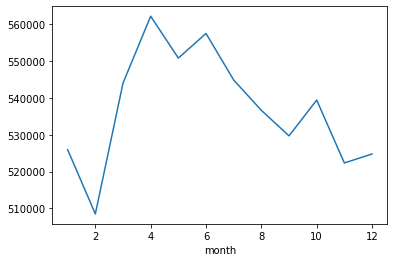

In [780]:
project2_raw_df.groupby('month').mean()['price']
project2_raw_df.groupby('month').mean()['price'].plot()

In [781]:
project2_raw_df['waterfront'].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

In [782]:
project2_raw_df['seattle'] = project2_raw_df['zipcode'].apply(lambda x : 0 if x == 98101 or x == 98102 or x == 98103 or x == 98104 or x == 98105 or x == 98106 or x == 98107 or x == 98109 or x == 98111 or x == 98112 or x == 98114 or x == 98116 or x == 98117 or x == 98118 or x == 98119 or x == 98121 or x == 98122 or x == 98124 or x == 98125 or x == 98126 or x == 98131 or x == 98132 or x == 98133 or x == 98134 or x == 98136 or x == 98144 or x == 98145 or x == 98146 or x == 98148 or x == 98154  or x == 98160 or x == 98161 or x == 98164 or x == 98166 or x == 98171 or x == 98174 or x== 98178 or x == 98199 else 1) 
#project2_raw_df['seattle'] = project2_raw_df['zipcode'].apply(lambda x : 'yes' if x == 98101 or x == 98102 or x == 98103 or x == 98104 or x == 98105 or x == 98106 or x == 98107 or x == 98109 or x == 98111 or x == 98112 or x == 98114 or x == 98116 or x == 98117 or x == 98118 or x == 98119 or x == 98121 or x == 98122 or x == 98124 or x == 98125 or x == 98126 or x == 98131 or x == 98132 or x == 98133 or x == 98134 or x == 98136 or x == 98144 or x == 98145 or x == 98146 or x == 98148 or x == 98154  or x == 98160 or x == 98161 or x == 98164 or x == 98166 or x == 98171 or x == 98174 or x== 98178 or x == 98199 else 'no') 
project2_raw_df['seattle'].value_counts(normalize=True)

1    0.684308
0    0.315692
Name: seattle, dtype: float64

zipcode 98198, 98188, 98168, 98166. 98158, 98146, 98138, 98108 werent used as multicities were in the same area code. 0 count as seattle 1 count as non-seattle.

In [783]:
#fill na with no value and change yes to 1 n no to 0
project2_raw_df['waterfront'] = project2_raw_df['waterfront'].fillna(value = 'NO')
project2_raw_df['waterfront'] = project2_raw_df['waterfront'].replace(to_replace = ['YES','NO'],value = [1,0])
project2_raw_df['waterfront'].value_counts()

0    21451
1      146
Name: waterfront, dtype: int64

In [784]:
project2_raw_df['view'].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [785]:
#fill na with no value & replace cateogrical rating with (0 to 4 scale. 0 -None, and 4 - excellent)
project2_raw_df['view'] = project2_raw_df['view'].fillna(value = 'NONE')
project2_raw_df['view'] = project2_raw_df['view'].replace(to_replace = ['NONE','AVERAGE','GOOD','FAIR','EXCELLENT'],value = [0,1,2,3,4])
project2_raw_df['view'].value_counts()

0    19485
1      957
2      508
3      330
4      317
Name: view, dtype: int64

In [786]:
project2_raw_df['condition'].value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

In [787]:
# replace cateogrical rating with (0 to 5 scale. 0 - Poor, and 4 - Very Good)
project2_raw_df['condition'] = project2_raw_df['condition'].replace(to_replace = ['Poor','Fair','Average','Good','Very Good'],value = [0,1,2,3,4])
project2_raw_df['condition'].value_counts()

2    14020
3     5677
4     1701
1      170
0       29
Name: condition, dtype: int64

In [788]:
project2_raw_df['grade'].value_counts

<bound method IndexOpsMixin.value_counts of 0            7 Average
1            7 Average
2        6 Low Average
3            7 Average
4               8 Good
             ...      
21592           8 Good
21593           8 Good
21594        7 Average
21595           8 Good
21596        7 Average
Name: grade, Length: 21597, dtype: object>

In [789]:
# grab the numerical rating and assign it to interger type
project2_raw_df['new_grade'] = project2_raw_df['grade'].astype(str).str[0]
project2_raw_df['new_grade'] = project2_raw_df['new_grade'].astype(int)
project2_raw_df['new_grade'].dtype

dtype('int32')

In [790]:
# reduce the oullier bedrooms #33
project2_raw_df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [791]:
project2_raw_df = project2_raw_df[project2_raw_df['bedrooms']<12]
#project2_raw_df.info()

In [792]:
project2_raw_df['bathrooms'].value_counts()

2.50    5377
1.00    3851
1.75    3047
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [793]:
#grouping seattle into zipcode which it solely belongs https://www.ciclt.net/sn/clt/capitolimpact/gw_ziplist.aspx?FIPS=53033 
project2_raw_df['seattle'] = project2_raw_df['zipcode'].apply(lambda x : 0 if x == 98101 or x == 98102 or x == 98103 or x == 98104 or x == 98105 or x == 98106 or x == 98107 or x == 98109 or x == 98111 or x == 98112 or x == 98114 or x == 98116 or x == 98117 or x == 98118 or x == 98119 or x == 98121 or x == 98122 or x == 98124 or x == 98125 or x == 98126 or x == 98131 or x == 98132 or x == 98133 or x == 98134 or x == 98136 or x == 98144 or x == 98145 or x == 98146 or x == 98148 or x == 98154  or x == 98160 or x == 98161 or x == 98164 or x == 98166 or x == 98171 or x == 98174 or x== 98178 or x == 98199 else 1) 
#project2_raw_df['seattle'] = project2_raw_df['zipcode'].apply(lambda x : 'yes' if x == 98101 or x == 98102 or x == 98103 or x == 98104 or x == 98105 or x == 98106 or x == 98107 or x == 98109 or x == 98111 or x == 98112 or x == 98114 or x == 98116 or x == 98117 or x == 98118 or x == 98119 or x == 98121 or x == 98122 or x == 98124 or x == 98125 or x == 98126 or x == 98131 or x == 98132 or x == 98133 or x == 98134 or x == 98136 or x == 98144 or x == 98145 or x == 98146 or x == 98148 or x == 98154  or x == 98160 or x == 98161 or x == 98164 or x == 98166 or x == 98171 or x == 98174 or x== 98178 or x == 98199 else 'no') 
project2_raw_df['seattle'].value_counts(normalize=True)

1    0.68434
0    0.31566
Name: seattle, dtype: float64

zipcode 98198, 98188, 98168, 98166. 98158, 98146, 98138, 98108 werent used as multicities were in the same area code. 0 count as seattle 1 count as non-seattle.

In [794]:
#project2_raw_df['zipcode'] = project2_raw_df.zipcode.astype('category')

In [795]:
project2_raw_df.isnull().sum()

id                  0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
month               0
year                0
seattle             0
new_grade           0
dtype: int64

In [796]:
#project2_raw_df['seattle'] = project2_raw_df['zipcode'].apply(lambda code : 0 if code == 98101 else 1)
#project2_raw_df['seattle'].sum()

In [797]:
#project2_raw_df.shape

In [798]:
#project2_raw_df.info()

In [799]:
#project2_raw_df.nunique()

In [800]:
#project2_raw_df.info()

floors - Categorical Nominal feature
waterfront - Categorical Nominal feature
view - Categorical Ordinal feature
condition - Categorical Ordinal feature
grade - Categorical Ordinal feature
bedrooms - Categorical Nominal feature
bathrooms - Categorical Nominal feature

In [801]:
# fillna with 0 to NaN for year_renovated- assuming there is no renovation.
project2_raw_df['yr_renovated'] = project2_raw_df['yr_renovated'].fillna(value = 0)
project2_raw_df.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
month            0
year             0
seattle          0
new_grade        0
dtype: int64

<AxesSubplot:>

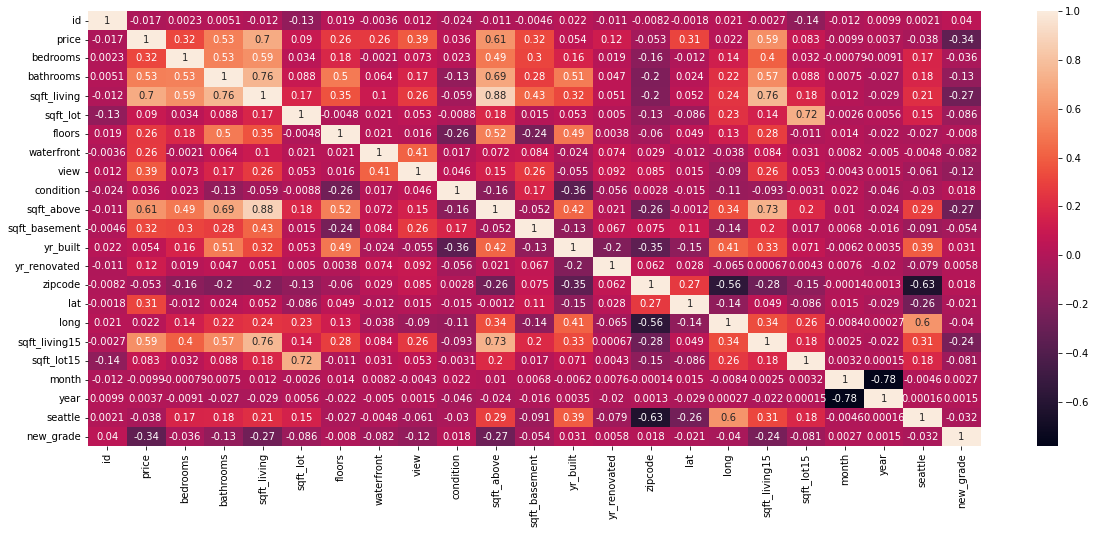

In [802]:
plt.figure(figsize=(20,8))
sns.heatmap(project2_raw_df.corr(),annot = True)

In [803]:
project2_raw_df.corr()['price'].sort_values(ascending = False)

price            1.000000
sqft_living      0.701929
sqft_above       0.605392
sqft_living15    0.585267
bathrooms        0.525915
view             0.386435
sqft_basement    0.320655
bedrooms         0.315961
lat              0.306687
waterfront       0.264308
floors           0.256820
yr_renovated     0.117858
sqft_lot         0.089879
sqft_lot15       0.082849
yr_built         0.053965
condition        0.036031
long             0.022047
year             0.003736
month           -0.009926
id              -0.016763
seattle         -0.037881
zipcode         -0.053409
new_grade       -0.340626
Name: price, dtype: float64

In [804]:
project2_raw_df['view'].value_counts()

0    19484
1      957
2      508
3      330
4      317
Name: view, dtype: int64

In [805]:
project2_raw_df.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
month            0
year             0
seattle          0
new_grade        0
dtype: int64

floors - Categorical Nominal feature #done
waterfront - Categorical Nominal feature #done
view - Categorical Ordinal feature #done
condition - Categorical Ordinal feature #done
grade - Categorical Ordinal feature #done w new grade
bedrooms - Categorical Nominal feature #done w reduce 33 
bathrooms - Categorical Nominal feature #done
seattle - catergorical Nominal feature # done w seattle

In [806]:
project2_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21596 non-null  int64  
 1   price          21596 non-null  float64
 2   bedrooms       21596 non-null  int64  
 3   bathrooms      21596 non-null  float64
 4   sqft_living    21596 non-null  int64  
 5   sqft_lot       21596 non-null  int64  
 6   floors         21596 non-null  float64
 7   waterfront     21596 non-null  int64  
 8   view           21596 non-null  int64  
 9   condition      21596 non-null  int64  
 10  grade          21596 non-null  object 
 11  sqft_above     21596 non-null  int64  
 12  sqft_basement  21596 non-null  float64
 13  yr_built       21596 non-null  int64  
 14  yr_renovated   21596 non-null  float64
 15  zipcode        21596 non-null  int64  
 16  lat            21596 non-null  float64
 17  long           21596 non-null  float64
 18  sqft_l

In [807]:
#project2_raw_df = project2_raw_df[project2_raw_df['bedrooms']<12]
#project2_raw_df.info()

In [808]:
#project2_raw_df['bathrooms'].value_counts()

In [809]:
#project2_raw_df.columns'floors','waterfront','view','condition','new_grade','seattle','bedrooms','bathrooms'
#dummydf = project2_raw_df[['floors','waterfront','new_grade','zipcode','bedrooms']]
dummydf = project2_raw_df[['floors','waterfront','view','condition','new_grade','seattle','bedrooms','bathrooms']]

In [810]:
#pd.get_dummies(dummydf,columns=['floors','new_grade','zipcode','bedrooms'],drop_first=True)
project2_one_hot_df = pd.get_dummies(dummydf,columns=['floors','waterfront','view','condition','new_grade','seattle','bedrooms','bathrooms'],drop_first=True)
print(project2_one_hot_df.columns.values)

['floors_1.5' 'floors_2.0' 'floors_2.5' 'floors_3.0' 'floors_3.5'
 'waterfront_1' 'view_1' 'view_2' 'view_3' 'view_4' 'condition_1'
 'condition_2' 'condition_3' 'condition_4' 'new_grade_3' 'new_grade_4'
 'new_grade_5' 'new_grade_6' 'new_grade_7' 'new_grade_8' 'new_grade_9'
 'seattle_1' 'bedrooms_2' 'bedrooms_3' 'bedrooms_4' 'bedrooms_5'
 'bedrooms_6' 'bedrooms_7' 'bedrooms_8' 'bedrooms_9' 'bedrooms_10'
 'bedrooms_11' 'bathrooms_0.75' 'bathrooms_1.0' 'bathrooms_1.25'
 'bathrooms_1.5' 'bathrooms_1.75' 'bathrooms_2.0' 'bathrooms_2.25'
 'bathrooms_2.5' 'bathrooms_2.75' 'bathrooms_3.0' 'bathrooms_3.25'
 'bathrooms_3.5' 'bathrooms_3.75' 'bathrooms_4.0' 'bathrooms_4.25'
 'bathrooms_4.5' 'bathrooms_4.75' 'bathrooms_5.0' 'bathrooms_5.25'
 'bathrooms_5.5' 'bathrooms_5.75' 'bathrooms_6.0' 'bathrooms_6.25'
 'bathrooms_6.5' 'bathrooms_6.75' 'bathrooms_7.5' 'bathrooms_7.75'
 'bathrooms_8.0']


In [868]:
project2_raw_df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
Name: bedrooms, dtype: int64

In [811]:
project2_data_df = pd.concat([project2_raw_df,project2_one_hot_df],axis=1)
#project2_data_df.drop("floors","waterfront","view","condition","new_grade","seattle","bedrooms","bathrooms",axis=1)
#zbed = project2_raw_df['bedrooms'].quantile(0.999)
#zbed

In [812]:
print(project2_raw_df.columns.values)

['id' 'price' 'bedrooms' 'bathrooms' 'sqft_living' 'sqft_lot' 'floors'
 'waterfront' 'view' 'condition' 'grade' 'sqft_above' 'sqft_basement'
 'yr_built' 'yr_renovated' 'zipcode' 'lat' 'long' 'sqft_living15'
 'sqft_lot15' 'month' 'year' 'seattle' 'new_grade']


In [813]:
project2_data_df = project2_data_df.drop("id", axis =1)
project2_data_df = project2_data_df.drop("floors", axis =1)
project2_data_df = project2_data_df.drop("waterfront", axis =1)
project2_data_df = project2_data_df.drop("view", axis =1)
project2_data_df = project2_data_df.drop("condition", axis =1)
project2_data_df = project2_data_df.drop("grade", axis =1)
project2_data_df = project2_data_df.drop("new_grade", axis =1)
project2_data_df = project2_data_df.drop("seattle", axis =1)
project2_data_df = project2_data_df.drop("bedrooms", axis =1)
project2_data_df = project2_data_df.drop("bathrooms", axis =1)
#print(project2_data_df.columns_values())
#project2_data_df = project2_data_df.drop("floors", axis =1)
#project2_data_df

In [814]:
#zbath = project2_raw_df['bathrooms'].quantile(0.999)
#zbath

In [815]:
#project2_raw_bed_df = project2_raw_df[project2_raw_df['bedrooms']<12]
#project2_raw_bed_df.info()

In [816]:
#project2_raw_bed_bath_df = project2_raw_bed_df[project2_raw_bed_df['bathrooms']<5.5]
#project2_raw_bed_bath_df.info()

In [817]:
project2_data_df.corr()['price'].sort_values(ascending = False).head(10)

price            1.000000
sqft_living      0.701929
sqft_above       0.605392
sqft_living15    0.585267
sqft_basement    0.320655
lat              0.306687
view_4           0.303062
waterfront_1     0.264308
new_grade_9      0.235864
floors_2.0       0.232710
Name: price, dtype: float64

<AxesSubplot:>

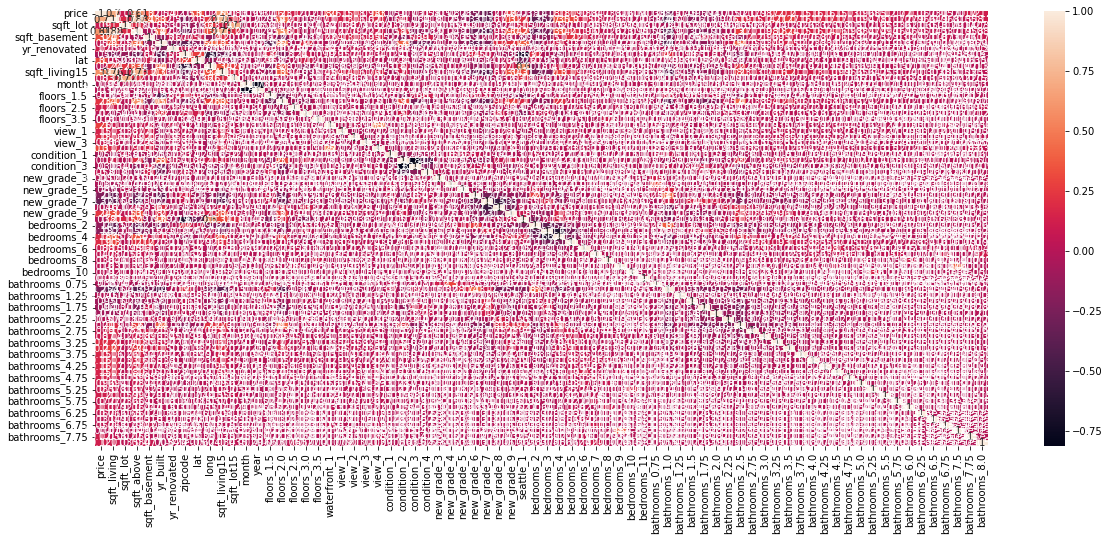

In [818]:
plt.figure(figsize=(20,8))
sns.heatmap(project2_data_df.corr(),annot = True)

In [819]:
project2_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 74 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           21596 non-null  float64
 1   sqft_living     21596 non-null  int64  
 2   sqft_lot        21596 non-null  int64  
 3   sqft_above      21596 non-null  int64  
 4   sqft_basement   21596 non-null  float64
 5   yr_built        21596 non-null  int64  
 6   yr_renovated    21596 non-null  float64
 7   zipcode         21596 non-null  int64  
 8   lat             21596 non-null  float64
 9   long            21596 non-null  float64
 10  sqft_living15   21596 non-null  int64  
 11  sqft_lot15      21596 non-null  int64  
 12  month           21596 non-null  int64  
 13  year            21596 non-null  int64  
 14  floors_1.5      21596 non-null  uint8  
 15  floors_2.0      21596 non-null  uint8  
 16  floors_2.5      21596 non-null  uint8  
 17  floors_3.0      21596 non-null 

In [820]:
#print(project2_data_df.columns.values)
project2_data1_df = project2_data_df.rename(columns={'floors_1.5' : 'floors_1_5'})
project2_data1_df = project2_data_df.rename(columns={'floors_2.0' : 'floors_2_0'})
print(project2_data_df.columns.values)
#y = project2_data_df['price']
#X = Project2_data_df.drop('price')
#OLS(endog exog = add_constant(x))

['price' 'sqft_living' 'sqft_lot' 'sqft_above' 'sqft_basement' 'yr_built'
 'yr_renovated' 'zipcode' 'lat' 'long' 'sqft_living15' 'sqft_lot15'
 'month' 'year' 'floors_1.5' 'floors_2.0' 'floors_2.5' 'floors_3.0'
 'floors_3.5' 'waterfront_1' 'view_1' 'view_2' 'view_3' 'view_4'
 'condition_1' 'condition_2' 'condition_3' 'condition_4' 'new_grade_3'
 'new_grade_4' 'new_grade_5' 'new_grade_6' 'new_grade_7' 'new_grade_8'
 'new_grade_9' 'seattle_1' 'bedrooms_2' 'bedrooms_3' 'bedrooms_4'
 'bedrooms_5' 'bedrooms_6' 'bedrooms_7' 'bedrooms_8' 'bedrooms_9'
 'bedrooms_10' 'bedrooms_11' 'bathrooms_0.75' 'bathrooms_1.0'
 'bathrooms_1.25' 'bathrooms_1.5' 'bathrooms_1.75' 'bathrooms_2.0'
 'bathrooms_2.25' 'bathrooms_2.5' 'bathrooms_2.75' 'bathrooms_3.0'
 'bathrooms_3.25' 'bathrooms_3.5' 'bathrooms_3.75' 'bathrooms_4.0'
 'bathrooms_4.25' 'bathrooms_4.5' 'bathrooms_4.75' 'bathrooms_5.0'
 'bathrooms_5.25' 'bathrooms_5.5' 'bathrooms_5.75' 'bathrooms_6.0'
 'bathrooms_6.25' 'bathrooms_6.5' 'bathrooms_6.75' 'ba

In [821]:
project2_data_df = project2_data_df.rename(columns={"floors_1.5" : "floors_1_5","floors_2.0" : "floors_2_0","floors_2.5" : "floors_2_5","floors_3.0" : "floors_3_0","floors_3.5" : "floors_3_5"})
project2_data_df = project2_data_df.rename(columns={"bathrooms_0.75":"bathrooms_0_75","bathrooms_1.0":"bathrooms_1_0","bathrooms_1.25":"bathrooms_1_25","bathrooms_1.5":"bathrooms_1_5","bathrooms_1.75":"bathrooms_1_75"})
project2_data_df = project2_data_df.rename(columns={"bathrooms_2.0":"bathrooms_2_0","bathrooms_2.25":"bathrooms_2_25","bathrooms_2.5":"bathrooms_2_5","bathrooms_2.75":"bathrooms_2_75"})
project2_data_df = project2_data_df.rename(columns={"bathrooms_3.0":"bathrooms_3_0","bathrooms_3.25":"bathrooms_3_25","bathrooms_3.5":"bathrooms_3_5","bathrooms_3.75":"bathrooms_3_75"})
project2_data_df = project2_data_df.rename(columns={"bathrooms_4.0":"bathrooms_4_0","bathrooms_4.25":"bathrooms_4_25","bathrooms_4.5":"bathrooms_4_5","bathrooms_4.75":"bathrooms_4_75"})
project2_data_df = project2_data_df.rename(columns={"bathrooms_5.0":"bathrooms_5_0","bathrooms_5.25":"bathrooms_5_25","bathrooms_5.5":"bathrooms_5_5","bathrooms_5.75":"bathrooms_5_75"})
project2_data_df = project2_data_df.rename(columns={"bathrooms_6.0":"bathrooms_6_0","bathrooms_6.25":"bathrooms_6_25","bathrooms_6.5":"bathrooms_6_5","bathrooms_6.75":"bathrooms_6_75"})
project2_data_df = project2_data_df.rename(columns={"bathrooms_7.5":"bathrooms_7_5","bathrooms_7.75":"bathrooms_7_75","bathrooms_8.0":"bathrooms_8_0"})
print(project2_data_df.columns.values)

['price' 'sqft_living' 'sqft_lot' 'sqft_above' 'sqft_basement' 'yr_built'
 'yr_renovated' 'zipcode' 'lat' 'long' 'sqft_living15' 'sqft_lot15'
 'month' 'year' 'floors_1_5' 'floors_2_0' 'floors_2_5' 'floors_3_0'
 'floors_3_5' 'waterfront_1' 'view_1' 'view_2' 'view_3' 'view_4'
 'condition_1' 'condition_2' 'condition_3' 'condition_4' 'new_grade_3'
 'new_grade_4' 'new_grade_5' 'new_grade_6' 'new_grade_7' 'new_grade_8'
 'new_grade_9' 'seattle_1' 'bedrooms_2' 'bedrooms_3' 'bedrooms_4'
 'bedrooms_5' 'bedrooms_6' 'bedrooms_7' 'bedrooms_8' 'bedrooms_9'
 'bedrooms_10' 'bedrooms_11' 'bathrooms_0_75' 'bathrooms_1_0'
 'bathrooms_1_25' 'bathrooms_1_5' 'bathrooms_1_75' 'bathrooms_2_0'
 'bathrooms_2_25' 'bathrooms_2_5' 'bathrooms_2_75' 'bathrooms_3_0'
 'bathrooms_3_25' 'bathrooms_3_5' 'bathrooms_3_75' 'bathrooms_4_0'
 'bathrooms_4_25' 'bathrooms_4_5' 'bathrooms_4_75' 'bathrooms_5_0'
 'bathrooms_5_25' 'bathrooms_5_5' 'bathrooms_5_75' 'bathrooms_6_0'
 'bathrooms_6_25' 'bathrooms_6_5' 'bathrooms_6_75' 'ba

In [822]:
import statsmodels.api as sm

In [823]:
project2_data_df.columns

Index(['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'month', 'year', 'floors_1_5', 'floors_2_0', 'floors_2_5',
       'floors_3_0', 'floors_3_5', 'waterfront_1', 'view_1', 'view_2',
       'view_3', 'view_4', 'condition_1', 'condition_2', 'condition_3',
       'condition_4', 'new_grade_3', 'new_grade_4', 'new_grade_5',
       'new_grade_6', 'new_grade_7', 'new_grade_8', 'new_grade_9', 'seattle_1',
       'bedrooms_2', 'bedrooms_3', 'bedrooms_4', 'bedrooms_5', 'bedrooms_6',
       'bedrooms_7', 'bedrooms_8', 'bedrooms_9', 'bedrooms_10', 'bedrooms_11',
       'bathrooms_0_75', 'bathrooms_1_0', 'bathrooms_1_25', 'bathrooms_1_5',
       'bathrooms_1_75', 'bathrooms_2_0', 'bathrooms_2_25', 'bathrooms_2_5',
       'bathrooms_2_75', 'bathrooms_3_0', 'bathrooms_3_25', 'bathrooms_3_5',
       'bathrooms_3_75', 'bathrooms_4_0', 'bathrooms_4_25', 'bathrooms_4_5',
       'bathro

In [824]:
project2_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 74 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           21596 non-null  float64
 1   sqft_living     21596 non-null  int64  
 2   sqft_lot        21596 non-null  int64  
 3   sqft_above      21596 non-null  int64  
 4   sqft_basement   21596 non-null  float64
 5   yr_built        21596 non-null  int64  
 6   yr_renovated    21596 non-null  float64
 7   zipcode         21596 non-null  int64  
 8   lat             21596 non-null  float64
 9   long            21596 non-null  float64
 10  sqft_living15   21596 non-null  int64  
 11  sqft_lot15      21596 non-null  int64  
 12  month           21596 non-null  int64  
 13  year            21596 non-null  int64  
 14  floors_1_5      21596 non-null  uint8  
 15  floors_2_0      21596 non-null  uint8  
 16  floors_2_5      21596 non-null  uint8  
 17  floors_3_0      21596 non-null 

In [825]:
#take a log on price
project2_data_df['price'] = np.log(project2_data_df['price'])
project2_data_df.head()

price  sqft_living  sqft_lot  sqft_above  sqft_basement  yr_built  \
0  12.309982         1180      5650        1180            0.0      1955   
1  13.195614         2570      7242        2170          400.0      1951   
2  12.100712          770     10000         770            0.0      1933   
3  13.311329         1960      5000        1050          910.0      1965   
4  13.142166         1680      8080        1680            0.0      1987   

   yr_renovated  zipcode      lat     long  ...  bathrooms_5_25  \
0           0.0    98178  47.5112 -122.257  ...               0   
1        1991.0    98125  47.7210 -122.319  ...               0   
2           0.0    98028  47.7379 -122.233  ...               0   
3           0.0    98136  47.5208 -122.393  ...               0   
4           0.0    98074  47.6168 -122.045  ...               0   

   bathrooms_5_5  bathrooms_5_75  bathrooms_6_0  bathrooms_6_25  \
0              0               0              0               0   
1              0               0              0               0   
2              0               0              0               0   
3              0               0              0               0   
4              0               0              0               0   

   bathrooms_6_5  bathrooms_6_75  bathrooms_7_5  bathrooms_7_75  bathrooms_8_0  
0              0               0              0               0              0  
1              0               0              0               0              0  
2              0               0              0               0              0  
3              0               0              0               0              0  
4              0               0              0               0              0  

[5 rows x 74 columns]

In [826]:
y = project2_data_df['price']
X= project2_data_df.drop('price',1)
Xcont = sm.add_constant(X)
model = sm.OLS(endog = y, exog = Xcont)
model = sm.OLS(y,X)
res = model.fit()
print(res.summary())

C:\Users\eggfr\AppData\Local\Temp\ipykernel_15520\282650282.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X= project2_data_df.drop('price',1)


                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          8.536e+05
Date:                Wed, 22 Jun 2022   Prob (F-statistic):                        0.00
Time:                        14:05:28   Log-Likelihood:                         -60.928
No. Observations:               21596   AIC:                                      267.9
Df Residuals:                   21523   BIC:                                      850.4
Df Model:                          73                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [827]:
#create train-test set using 75-25 (train-test and random state = 42) randomly split the data
x_train, x_test, y_train, y_test = train_test_split(X, y ,test_size=0.25,random_state=42)
# shape of train and test splits
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((16197, 73), (5399, 73), (16197,), (5399,))

In [828]:
##normalize data after split- as data_set would would have different mean/SD and affect distribtuion.
#def norm_feat(series):
#    return (series - series.mean())/series.std()
#for feat in ['piece_count', 'num_reviews', 'play_star_rating', 'star_rating', 'val_star_rating']:
#    df[feat] = norm_feat(df[feat])
#df.describe()

In [829]:
#scale data w MinMaxScaler 'sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15 for both train n data set

#norm_set = ['sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15']
#trans = MinMaxScaler()
#data1 = trans.fit_transform(x_train[norm_set])

features = ['sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15']
autoscaler = MinMaxScaler()

x_train[features] = autoscaler.fit_transform(x_train[features])
x_test[features] = autoscaler.fit_transform(x_test[features])
#features = ["col1", "col2", "col3", "col4"],''
#autoscaler = StandardScaler()
#df[features] = autoscaler.fit_transform(df[features])


In [830]:
print(x_train.columns.values)


['sqft_living' 'sqft_lot' 'sqft_above' 'sqft_basement' 'yr_built'
 'yr_renovated' 'zipcode' 'lat' 'long' 'sqft_living15' 'sqft_lot15'
 'month' 'year' 'floors_1_5' 'floors_2_0' 'floors_2_5' 'floors_3_0'
 'floors_3_5' 'waterfront_1' 'view_1' 'view_2' 'view_3' 'view_4'
 'condition_1' 'condition_2' 'condition_3' 'condition_4' 'new_grade_3'
 'new_grade_4' 'new_grade_5' 'new_grade_6' 'new_grade_7' 'new_grade_8'
 'new_grade_9' 'seattle_1' 'bedrooms_2' 'bedrooms_3' 'bedrooms_4'
 'bedrooms_5' 'bedrooms_6' 'bedrooms_7' 'bedrooms_8' 'bedrooms_9'
 'bedrooms_10' 'bedrooms_11' 'bathrooms_0_75' 'bathrooms_1_0'
 'bathrooms_1_25' 'bathrooms_1_5' 'bathrooms_1_75' 'bathrooms_2_0'
 'bathrooms_2_25' 'bathrooms_2_5' 'bathrooms_2_75' 'bathrooms_3_0'
 'bathrooms_3_25' 'bathrooms_3_5' 'bathrooms_3_75' 'bathrooms_4_0'
 'bathrooms_4_25' 'bathrooms_4_5' 'bathrooms_4_75' 'bathrooms_5_0'
 'bathrooms_5_25' 'bathrooms_5_5' 'bathrooms_5_75' 'bathrooms_6_0'
 'bathrooms_6_25' 'bathrooms_6_5' 'bathrooms_6_75' 'bathrooms_

In [833]:
x_train

sqft_living  sqft_lot  sqft_above  sqft_basement  yr_built  \
2358      0.050873  0.004605    0.074115       0.000000      1971   
6405      0.114655  0.002410    0.167035       0.000000      1993   
937       0.125285  0.003661    0.103982       0.147303      1994   
19076     0.330296  0.298645    0.397124       0.157676      1975   
15201     0.080486  0.002035    0.117257       0.000000      1949   
...            ...       ...         ...            ...       ...   
11964     0.141230  0.003198    0.205752       0.000000      2004   
21576     0.062263  0.000412    0.090708       0.000000      2008   
5390      0.088079  0.005137    0.128319       0.000000      1976   
860       0.000759  0.008771    0.001106       0.000000      1963   
15795     0.181093  0.006719    0.263827       0.000000      2001   

       yr_renovated  zipcode      lat     long  sqft_living15  ...  \
2358            0.0    98198  47.3731 -122.312       0.184306  ...   
6405            0.0    98029  47.5664 -121.999       0.297883  ...   
937             0.0    98042  47.3545 -122.158       0.225607  ...   
19076           0.0    98027  47.4536 -122.009       0.303046  ...   
15201           0.0    98117  47.6844 -122.392       0.177422  ...   
...             ...      ...      ...      ...            ...  ...   
11964           0.0    98065  47.5308 -121.847       0.315092  ...   
21576           0.0    98103  47.6542 -122.346       0.134400  ...   
5390            0.0    98014  47.6492 -121.908       0.192910  ...   
860             0.0    98168  47.4810 -122.323       0.132679  ...   
15795           0.0    98019  47.7394 -121.965       0.416624  ...   

       bathrooms_5_25  bathrooms_5_5  bathrooms_5_75  bathrooms_6_0  \
2358                0              0               0              0   
6405                0              0               0              0   
937                 0              0               0              0   
19076               0              0               0              0   
15201               0              0               0              0   
...               ...            ...             ...            ...   
11964               0              0               0              0   
21576               0              0               0              0   
5390                0              0               0              0   
860                 0              0               0              0   
15795               0              0               0              0   

       bathrooms_6_25  bathrooms_6_5  bathrooms_6_75  bathrooms_7_5  \
2358                0              0               0              0   
6405                0              0               0              0   
937                 0              0               0              0   
19076               0              0               0              0   
15201               0              0               0              0   
...               ...            ...             ...            ...   
11964               0              0               0              0   
21576               0              0               0              0   
5390                0              0               0              0   
860                 0              0               0              0   
15795               0              0               0              0   

       bathrooms_7_75  bathrooms_8_0  
2358                0              0  
6405                0              0  
937                 0              0  
19076               0              0  
15201               0              0  
...               ...            ...  
11964               0              0  
21576               0              0  
5390                0              0  
860                 0              0  
15795               0              0  

[16197 rows x 73 columns]

In [858]:
feat1_col = ["sqft_living","sqft_lot","sqft_above","sqft_basement","sqft_living15","sqft_lot15","yr_built","zipcode","lat","floors_1_5","floors_2_0","floors_2_5","floors_3_0","floors_3_5","waterfront_1","view_1","view_2","view_3","view_4","condition_1","condition_2","condition_3","condition_4","new_grade_4","new_grade_5","new_grade_6","new_grade_7","new_grade_8","new_grade_9","seattle_1","bedrooms_2","bedrooms_3","bedrooms_4","bedrooms_5","bedrooms_6","bedrooms_7","bathrooms_0_75","bathrooms_1_0","bathrooms_1_25","bathrooms_1_5","bathrooms_1_75","bathrooms_2_0","bathrooms_2_25","bathrooms_2_5","bathrooms_2_75","bathrooms_3_0","bathrooms_3_25","bathrooms_3_5","bathrooms_3_75","bathrooms_4_0","bathrooms_4_25","bathrooms_4_5","bathrooms_4_75","bathrooms_5_0","bathrooms_5_25","bathrooms_5_5","bathrooms_5_75","bathrooms_6_0","bathrooms_6_25","bathrooms_6_5"]
x_train[feat1_col]


sqft_living  sqft_lot  sqft_above  sqft_basement  sqft_living15  \
2358      0.050873  0.004605    0.074115       0.000000       0.184306   
6405      0.114655  0.002410    0.167035       0.000000       0.297883   
937       0.125285  0.003661    0.103982       0.147303       0.225607   
19076     0.330296  0.298645    0.397124       0.157676       0.303046   
15201     0.080486  0.002035    0.117257       0.000000       0.177422   
...            ...       ...         ...            ...            ...   
11964     0.141230  0.003198    0.205752       0.000000       0.315092   
21576     0.062263  0.000412    0.090708       0.000000       0.134400   
5390      0.088079  0.005137    0.128319       0.000000       0.192910   
860       0.000759  0.008771    0.001106       0.000000       0.132679   
15795     0.181093  0.006719    0.263827       0.000000       0.416624   

       sqft_lot15  yr_built  zipcode      lat  floors_1_5  ...  \
2358     0.009218      1971    98198  47.3731           0  ...   
6405     0.005127      1993    98029  47.5664           0  ...   
937      0.005169      1994    98042  47.3545           0  ...   
19076    0.251440      1975    98027  47.4536           0  ...   
15201    0.003709      1949    98117  47.6844           0  ...   
...           ...       ...      ...      ...         ...  ...   
11964    0.006245      2004    98065  47.5308           0  ...   
21576    0.000658      2008    98103  47.6542           0  ...   
5390     0.009016      1976    98014  47.6492           0  ...   
860      0.016483      1963    98168  47.4810           0  ...   
15795    0.013991      2001    98019  47.7394           0  ...   

       bathrooms_4_25  bathrooms_4_5  bathrooms_4_75  bathrooms_5_0  \
2358                0              0               0              0   
6405                0              0               0              0   
937                 0              0               0              0   
19076               0              0               0              0   
15201               0              0               0              0   
...               ...            ...             ...            ...   
11964               0              0               0              0   
21576               0              0               0              0   
5390                0              0               0              0   
860                 0              0               0              0   
15795               0              0               0              0   

       bathrooms_5_25  bathrooms_5_5  bathrooms_5_75  bathrooms_6_0  \
2358                0              0               0              0   
6405                0              0               0              0   
937                 0              0               0              0   
19076               0              0               0              0   
15201               0              0               0              0   
...               ...            ...             ...            ...   
11964               0              0               0              0   
21576               0              0               0              0   
5390                0              0               0              0   
860                 0              0               0              0   
15795               0              0               0              0   

       bathrooms_6_25  bathrooms_6_5  
2358                0              0  
6405                0              0  
937                 0              0  
19076               0              0  
15201               0              0  
...               ...            ...  
11964               0              0  
21576               0              0  
5390                0              0  
860                 0              0  
15795               0              0  

[16197 rows x 60 columns]

In [852]:
#x_test.drop([])

In [ ]:
x_test.shape
